# Cleaning and Validating CO2

# Imports + data validation

In [25]:
import pandas as pd
import numpy as np

# load all files
co2_data = pd.read_csv('../data/co2-data.csv')
# examining csv file
co2_data.shape

(25204, 58)

In [26]:
# reviewing data types
co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25204 entries, 0 to 25203
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             21948 non-null  object 
 1   country                              25204 non-null  object 
 2   year                                 25204 non-null  int64  
 3   co2                                  23949 non-null  float64
 4   consumption_co2                      3976 non-null   float64
 5   co2_growth_prct                      24931 non-null  float64
 6   co2_growth_abs                       23585 non-null  float64
 7   trade_co2                            3976 non-null   float64
 8   co2_per_capita                       23307 non-null  float64
 9   consumption_co2_per_capita           3976 non-null   float64
 10  share_global_co2                     23949 non-null  float64
 11  cumulative_co2              

In [27]:
# examining columns we'll be using
print(co2_data['country'].describe())
print(co2_data['country'].value_counts())
# Concerning keys: 'Asia', 'Asia (excl. China & India)','Europe',
#        'Europe (excl. EU-27)', 'Europe (excl. EU-28)','North America', 'North America (excl. USA)'
#        'South America','World', 'International transport'

count                    25204
unique                     244
top       Europe (excl. EU-27)
freq                       271
Name: country, dtype: object
Europe (excl. EU-27)                271
World                               271
Europe                              271
EU-28                               271
United Kingdom                      271
North America (excl. USA)           236
North America                       236
Canada                              236
EU-27                               229
Germany                             229
Poland                              221
United States                       221
France                              219
Belgium                             219
Austria                             214
Europe (excl. EU-28)                192
Norway                              192
Lithuania                           191
Russia                              191
Ukraine                             191
Spain                               191
Tajikis

In [28]:
print(co2_data['co2'].describe())
print(co2_data['co2'].value_counts())

count    23949.000000
mean       267.861942
std       1521.680894
min          0.000000
25%          0.528000
50%          4.857000
75%         42.818000
max      36702.503000
Name: co2, dtype: float64
0.004        301
0.011        186
0.007        131
0.048        128
0.029        122
0.022         99
0.026         94
0.066         91
0.015         87
0.040         75
0.084         74
0.018         73
0.037         69
0.033         68
0.051         67
0.062         64
0.103         60
0.161         59
0.059         57
0.055         55
0.044         55
0.121         51
0.143         51
0.073         49
0.216         48
0.000         48
0.198         46
0.088         44
0.099         44
0.070         44
0.081         43
0.234         42
0.077         39
0.150         38
0.114         38
0.183         37
0.125         36
0.180         35
0.106         33
0.092         33
0.220         33
0.128         32
0.147         32
0.172         31
0.158         30
0.202         30
0.209         30

In [29]:
########################
##### CO2 iso_code #####
########################
print(co2_data.iso_code.describe())
## 219 unique values
print(co2_data.iso_code.unique())
## concerning keys: nan, 'OWID_KOS', 'OWID_WRL'
print(co2_data.country[co2_data.iso_code.isnull()].unique())
## no iso_code when 'country' is continents, regions, territories, and other weird things
# df[df.iso_code == 'OWID_KOS'].head() # Kosovo, is a partially recognised state in Southeast Europe
# df[df.iso_code == 'OWID_WRL'].head() # world co2 summary each year. Other details are null.

pd.set_option('display.max_rows', co2_data.shape[0]+1)
co2_data.groupby('country').iso_code.unique()

count        21948
unique         219
top       OWID_WRL
freq           271
Name: iso_code, dtype: object
['AFG' nan 'ALB' 'DZA' 'AND' 'AGO' 'AIA' 'ATA' 'ATG' 'ARG' 'ARM' 'ABW'
 'AUS' 'AUT' 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU'
 'BTN' 'BOL' 'BES' 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'KHM'
 'CMR' 'CAN' 'CPV' 'CAF' 'TCD' 'CHL' 'CHN' 'CXR' 'COL' 'COM' 'COG' 'COK'
 'CRI' 'CIV' 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'COD' 'DNK' 'DJI' 'DMA' 'DOM'
 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST' 'SWZ' 'ETH' 'FRO' 'FJI' 'FIN' 'FRA'
 'GUF' 'PYF' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GRC' 'GRL' 'GRD' 'GLP' 'GTM'
 'GIN' 'GNB' 'GUY' 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ'
 'IRL' 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'OWID_KOS' 'KWT'
 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LIE' 'LTU' 'LUX' 'MDG' 'MWI'
 'MYS' 'MDV' 'MLI' 'MLT' 'MHL' 'MTQ' 'MRT' 'MUS' 'MYT' 'MEX' 'MDA' 'MNG'
 'MNE' 'MSR' 'MAR' 'MOZ' 'MMR' 'NAM' 'NRU' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC'
 'NER' 'NGA' 'NIU' 'P

country
Afghanistan                              [AFG]
Africa                                   [nan]
Albania                                  [ALB]
Algeria                                  [DZA]
Andorra                                  [AND]
Angola                                   [AGO]
Anguilla                                 [AIA]
Antarctica                               [ATA]
Antigua and Barbuda                      [ATG]
Argentina                                [ARG]
Armenia                                  [ARM]
Aruba                                    [ABW]
Asia                                     [nan]
Asia (excl. China & India)               [nan]
Australia                                [AUS]
Austria                                  [AUT]
Azerbaijan                               [AZE]
Bahamas                                  [BHS]
Bahrain                                  [BHR]
Bangladesh                               [BGD]
Barbados                                 [BRB]
Belar

In [30]:
## CO2 GDP ##
co2_data.gdp.describe()
co2_data.gdp.unique()
pd.DataFrame(co2_data[co2_data['gdp'].isnull()].country).groupby('country').size()

country
Afghanistan                           3
Africa                              137
Albania                              19
Algeria                              36
Andorra                              31
Angola                                2
Anguilla                             31
Antarctica                           34
Antigua and Barbuda                  64
Argentina                            14
Armenia                             151
Aruba                                95
Asia                                191
Asia (excl. China & India)          191
Australia                             2
Austria                              60
Azerbaijan                          151
Bahamas                              71
Bahrain                              19
Bangladesh                            6
Barbados                             24
Belarus                             151
Belgium                              45
Belize                               71
Benin                           

count    25204.000000
mean      1953.225797
std         53.791369
min       1750.000000
25%       1925.000000
50%       1967.000000
75%       1995.000000
max       2020.000000
Name: year, dtype: float64
2016    244
2015    244
2014    244
2013    244
2012    244
2011    244
2010    244
2009    244
2008    244
2019    243
2005    243
2002    243
2020    243
2004    243
2003    243
2006    243
2017    243
2018    243
2007    243
2001    242
1996    241
1992    241
1993    241
1994    241
1995    241
1997    241
1998    241
1999    241
2000    241
1991    240
1990    239
1989    228
1988    228
1987    228
1986    227
1985    227
1984    227
1982    227
1981    227
1983    227
1976    226
1972    226
1973    226
1974    226
1975    226
1977    226
1978    226
1979    226
1980    226
1971    225
1970    224
1969    221
1968    220
1965    219
1964    219
1967    219
1966    219
1963    217
1962    216
1961    213
1960    212
1959    212
1958    204
1957    198
1956    196
1955    196
1954 

<AxesSubplot:>

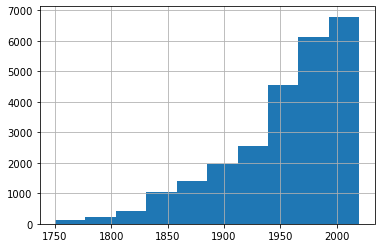

In [31]:
####################
##### CO2 year #####
####################
print(co2_data['year'].describe())
print(co2_data['year'].value_counts())
co2_data['year'].hist()

In [32]:
print(co2_data['total_ghg'].describe())
print(co2_data['total_ghg'].value_counts())

# negative min is concerning

count     5208.000000
mean       441.481429
std       3089.039496
min        -85.620000
25%          8.162500
50%         37.095000
75%        132.255000
max      49854.980000
Name: total_ghg, dtype: float64
 0.02        40
 0.03        26
 0.04        23
 0.10        21
 0.09        18
 0.11        18
 0.08        18
 0.05        14
 0.55        13
 0.14        13
 0.12        12
 0.27        12
 0.13        12
 0.15        11
 0.06        11
 0.16        10
 0.42        10
 0.25        10
 0.57        10
 0.58         9
 0.60         9
 0.56         8
 0.41         8
 0.54         8
 0.26         8
 0.07         7
 0.37         7
 0.28         7
 0.21         6
 0.18         6
 0.19         6
 0.35         6
 0.22         6
 0.00         6
 0.36         6
 0.52         6
 3.17         6
 0.83         6
 0.23         6
 0.63         5
 0.32         5
 0.29         5
 9.03         5
 0.53         5
 6.95         5
 0.70         5
 0.43         5
 0.01         5
 3.31         5
 0.24   

## Cleaning Time

In [33]:
# filtering to relevant dates and removing null values
columns = ['iso_code','country', 'year', 'co2','consumption_co2', 'co2_growth_prct','co2_growth_abs','trade_co2',
           'co2_per_capita','consumption_co2_per_capita','share_global_co2','cumulative_co2',
           'share_global_cumulative_co2','co2_per_gdp','consumption_co2_per_gdp', 'population', 
           'gdp', 'total_ghg', 'ghg_per_capita']
co2_data.replace('',np.nan, inplace=True) # replace empty strings with null to remove
co2_data.dropna(subset=['iso_code','co2'],inplace=True) # remove continents and columns without co2
co2_data.drop(co2_data.loc[co2_data['country']=='World'].index, inplace=True) #remove "World"
co2_data.drop(co2_data[co2_data['year'] < 1956].index , inplace=True) # only include dates after 1956
co2_data.drop(co2_data[co2_data['year'] > 2020].index , inplace=True) # only include dates before 2020
co2_data = co2_data[columns] # reducing data frame to only include relevant columns

In [34]:
# converting data types to floats for computation
co2_data['co2']=co2_data['co2'].astype(float) 
co2_data['total_ghg']=co2_data['total_ghg'].astype(float)
co2_data.to_pickle("../data/co2-data.pkl")

In [35]:
co2_data.head()

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,population,gdp,total_ghg,ghg_per_capita
7,AFG,Afghanistan,1956,0.183,NaN,19.05,0.029,NaN,0.022,NaN,0.0,0.832,0.0,0.016,NaN,8398873.0,1.158124e+10,NaN,NaN
8,AFG,Afghanistan,1957,0.293,NaN,60.00,0.110,NaN,0.034,NaN,0.0,1.125,0.0,0.025,NaN,8535157.0,1.157897e+10,NaN,NaN
9,AFG,Afghanistan,1958,0.330,NaN,12.50,0.037,NaN,0.038,NaN,0.0,1.455,0.0,0.027,NaN,8680097.0,1.223884e+10,NaN,NaN
10,AFG,Afghanistan,1959,0.385,NaN,16.62,0.055,NaN,0.044,NaN,0.0,1.839,0.0,0.031,NaN,8833947.0,1.257988e+10,NaN,NaN
11,AFG,Afghanistan,1960,0.414,NaN,7.62,0.029,NaN,0.046,NaN,0.0,2.253,0.0,0.032,NaN,8996967.0,1.303325e+10,NaN,NaN


In [36]:
# slimmed down dataset
co2_data.shape

(13325, 19)